In [6]:
data_path4 = "../weights/linearity/predicted_diff_ratios_gemma-2-2b-it_Layer16_concept_vector_random_concept_vector_gemma-2-2b-it_ConceptVectorAlpha0.01_AlphaFactor1000.pt"
data_path3 ="../weights/linearity/predicted_diff_ratios_gemma-2-2b-it_Layer16_concept_vector_gemma-2-2b-it_Layer16_difference-in-means_en-fr_ConceptVectorAlpha0.01_AlphaFactor1000.pt"

In [7]:
import torch
# data1 = torch.load(data_path1)
# data2 = torch.load(data_path2)
data3 = torch.load(data_path3)
data4 = torch.load(data_path4)

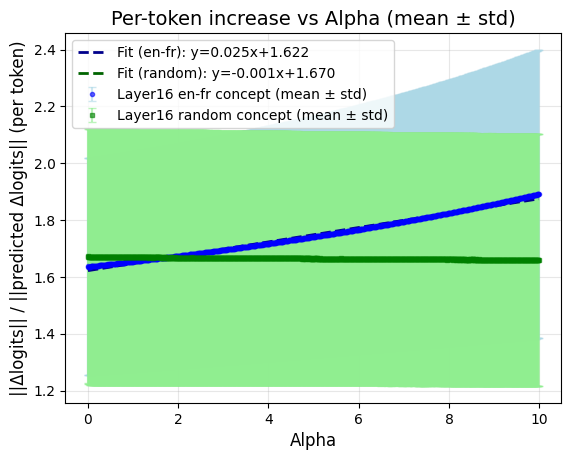

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Create x-axis values (alpha values)
concept_vector_alpha = 0.01
alpha_factor = 1000
x = [i * concept_vector_alpha for i in range(alpha_factor)]

# Extract mean and std from data3 and data4
means3 = data3['mean']
stds3 = data3['std']
means4 = data4['mean']
stds4 = data4['std']

# Plot data3 (en-fr concept) with error bars
plt.errorbar(x, means3, yerr=stds3, fmt='o', capsize=3, ecolor='lightblue', 
             alpha=0.6, markersize=3, label='Layer16 en-fr concept (mean ± std)', color='blue')
plt.plot(x, means3, '-', linewidth=1.5, color='blue')

# Plot data4 (random concept) with error bars
plt.errorbar(x, means4, yerr=stds4, fmt='s', capsize=3, ecolor='lightgreen', 
             alpha=0.6, markersize=3, label='Layer16 random concept (mean ± std)', color='green')
plt.plot(x, means4, '-', linewidth=1.5, color='green')

# Fit a linear regression line for data3
x_array = np.array(x)
means3_array = np.array(means3)
coeffs3 = np.polyfit(x_array, means3_array, 1)
poly_fn3 = np.poly1d(coeffs3)

# Plot the fitted line for data3
plt.plot(
    x,
    [poly_fn3(xi) for xi in x],
    "--",
    linewidth=2,
    color='darkblue',
    label=f"Fit (en-fr): y={coeffs3[0]:.3f}x+{coeffs3[1]:.3f}",
)

# Fit a linear regression line for data4
means4_array = np.array(means4)
coeffs4 = np.polyfit(x_array, means4_array, 1)
poly_fn4 = np.poly1d(coeffs4)

# Plot the fitted line for data4
plt.plot(
    x,
    [poly_fn4(xi) for xi in x],
    "--",
    linewidth=2,
    color='darkgreen',
    label=f"Fit (random): y={coeffs4[0]:.3f}x+{coeffs4[1]:.3f}",
)

# Add labels and title
plt.xlabel("Alpha", fontsize=12)
plt.ylabel("||Δlogits|| / ||predicted Δlogits|| (per token)", fontsize=12)
plt.title("Per-token increase vs Alpha (mean ± std)", fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

os.makedirs("../plots/linearity", exist_ok=True)
plt.savefig(
    "../plots/linearity/predicted_diff_ratios_gemma2_layer16_comparison.pdf"
)
plt.show()
plt.close()